# Homework 3 writeup solutions

## Name: Dylan Renard

## Problem 1

### Part a


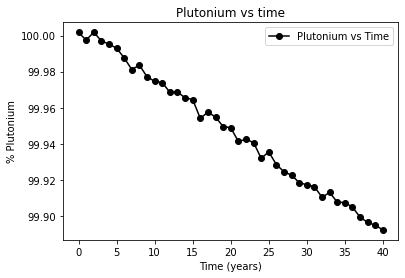

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

############## Problem 1 ################
M = np.genfromtxt('Plutonium.csv', delimiter=',')
t = M[0, :]
P = M[1, :]

fig, ax =plt.subplots()
ax.plot(t, P, '-ok', label='Plutonium vs Time')

plt.title("Plutonium vs time")
plt.xlabel('Time (years)')
plt.ylabel('% Plutonium')

plt.legend()
plt.show()

### Part b

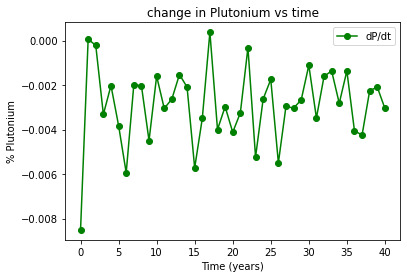

In [44]:

A1 = t[1] - t[0]

## Part b
# forward difference formula at t=0
A2 = (P[1] - P[0]) / A1 

## Part c
A3 = (P[-1] - P[-2]) / A1

## Part d
# Uncomment the line below to get A4
A4 = (-3*P[0] + 4*P[1] - P[2])/(2*A1)

## Part e #
A5 = (3*P[-1] - 4*P[-2] + P[-3])/(2*A1)


## Part f
# You may want to use a for loop here
rizz = np.zeros(41)
rizz[0], rizz[-1] = A4, A5

for k in range(1, len(t)-1):
    rizz[k] = (P[k+1] - P[k-1])/(2*A1)
A6 = rizz


plt.plot(t,A6, '-og', label='dP/dt')
plt.title("change in Plutonium vs time")
plt.xlabel('Time (years)')
plt.ylabel('% Plutonium')
plt.legend()
plt.show()

### Part c

The reason it looks jagged is because the graph of p vs time is not smooth and this drastically changes the derivative.

### Part d

Since there is so much range in the derivative from momement to moment, it makes sense in this case to use the average so that we get a better baseline.

## Problem 2

### Part a

In [45]:
mu = 85
sigma = 8.3
integrand = lambda x: np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

# Let's also define the left and right bounds of the integral
left = 110
right = 130

## Part a
A11, err = integrate.quad(integrand, left, right)
## Part b
# To define the h array, we can take 2 to the power of an array.
power = -np.linspace(1, 16, 16)

# Now create h from that array!
A12 = np.zeros(len(power))
dx = 0
for i in range(len(A12)):
    dx = 2**power[i]
    x = np.arange(110, 130 + dx, dx)
    y = integrand(x)
    A12[i] = dx * np.sum(y[:-1]) 


## Part c
A13 = np.zeros(len(power))
dx = 0
for i in range(len(A13)):
    dx = 2**power[i]
    x = np.arange(110, 130 + dx, dx)
    y = integrand(x)
    A13[i] = dx * np.sum(y[1:]) 


# ## Part d
A14 = np.zeros(len(power))
dx = 0
for i in range(len(A14)):
    dx = 2**power[i]
    x = np.arange(110, 130 + dx, dx)    
    for k in range(len(x) - 1):
        A14[i] += dx * integrand((x[k] +x[k+1])/2)

# ## Part e
A15 = (A12 + A13) / 2

# ## Part f
A16 = np.zeros(len(power))
for i in range(len(A16)):
    dx = 2**power[i]
    x = np.arange(110, 130 + dx, dx)
    y = integrand(x)
    A16[i] = (dx/ 3) * (y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-2:2]) + y[-1])




# Error calculations:

h = np.array(2**power)
LHR_error = np.array(np.abs(A12 -A11))
RHR_error = np.array(np.abs(A13 - A11))
Mid_error = np.array(np.abs(A14 - A11))
Trap_error = np.array(np.abs(A15 -A11))
Simpson_error = np.array(np.abs(A16 -A11))






### Part b-f

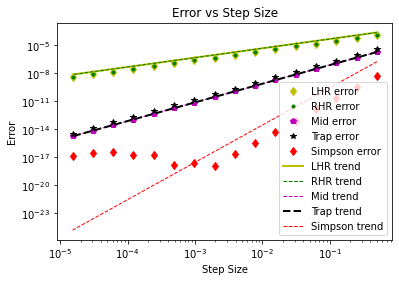

In [113]:


fig, ax = plt.subplots()
plt.rc('xtick',labelsize=10)
plt.rc('ytick', labelsize=10)
ax.loglog(h, LHR_error, 'dy', linewidth=2, label='LHR error')
ax.loglog(h, RHR_error, '.g', linewidth=1, label='RHR error')
ax.loglog(h, Mid_error, 'pm', linewidth=1, label='Mid error')
ax.loglog(h, Trap_error, '*k', linewidth=2, label='Trap error')
ax.loglog(h, Simpson_error, 'dr', linewidth=1, label='Simpson error')


ax.loglog(h, 0.0005*h, '-y', linewidth=2, label='LHR trend')
ax.loglog(h, 0.0005*h, '--g', linewidth=1, label='RHR trend')
ax.loglog(h, 0.000008*h**2, '--m', linewidth=1, label='Mid trend')
ax.loglog(h, 0.000008*h**2, '--k', linewidth=2, label='Trap trend')
ax.loglog(h, 0.000003*h**4, '--r', linewidth=1, label='Simpson trend')
plt.title('Error vs Step Size')
plt.xlabel('Step Size')
plt.ylabel('Error')

plt.legend(fontsize=10)
plt.show()

### Part g - discussion

#### (i) Definitely Simpson because the error is the lowest across all step sizes and we can clearly see this by looking at the y axis on the plot. Red values for simpson were the smallest throughout. We also learned in class that it has an error of order h^4 which is the smallest of the bunch, whereas Trap/Mid are of h^2 and LHR and RHR are of h order. 

#### (ii) At very small step sizes the Error decreases slowly before picking back up. I think this happens because as the step size increases so does the error. This may have to do with it being a 4th order error. So just like f(x) = x^4  function it dips down at small values of x and then back up again as x approaches infinity. I plotted this in desmos and thought it was really cool. If I did college over I would be an AMATH major. TA if your still reading this. Thank you for grading my work. :) 